In [1]:
import pandas as pd
import glob
import numpy as numpy
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Read in data


In [2]:
dict_of_stocks_and_dfs = {}
for file_ in glob.glob('../data/updated_historical_stock_data/*.csv'):
    stock_name = file_.rsplit("/")[-1].split('_')[0].lower() 
    print(f"Reading in {stock_name}")
    dict_of_stocks_and_dfs[stock_name] = pd.read_csv(f"{file_}")


Reading in pnr
Reading in bac
Reading in ni
Reading in vno
Reading in ual
Reading in efx
Reading in ph
Reading in rop
Reading in are
Reading in pg
Reading in pvh
Reading in lb
Reading in cern
Reading in peg
Reading in adbe
Reading in emr
Reading in ce
Reading in eqix
Reading in rost
Reading in so


In [3]:
# key is company value is df of data
dict_of_stocks_and_dfs.keys()

dict_keys(['pnr', 'bac', 'ni', 'vno', 'ual', 'efx', 'ph', 'rop', 'are', 'pg', 'pvh', 'lb', 'cern', 'peg', 'adbe', 'emr', 'ce', 'eqix', 'rost', 'so'])

# Create correlation & variance features
- Daily, weekly, 30-days, 90-days, 180-days, 365-days

In [4]:

# here the date is not the index, yet
first_stock_df = dict_of_stocks_and_dfs['ph'].loc[ dict_of_stocks_and_dfs['ph'].date.isin(dict_of_stocks_and_dfs['emr'].date), :]

In [5]:
np.var(first_stock_df.close)

2858.765436116092

In [6]:

# here the date is not the index, yet
first_stock_df = dict_of_stocks_and_dfs['ph'].loc[ dict_of_stocks_and_dfs['ph'].date.isin(dict_of_stocks_and_dfs['emr'].date), :]
#  filter second df by the dates in first

# here the date is not the index, yet
second_stock_df = dict_of_stocks_and_dfs['emr'].loc[ dict_of_stocks_and_dfs['emr'].date.isin(dict_of_stocks_and_dfs['ph'].date), :]

## Set the date as the index and sort

In [7]:
first_stock_df = first_stock_df.sort_values('date')
second_stock_df = second_stock_df.sort_values('date')

first_stock_df = first_stock_df.set_index('date')
second_stock_df = second_stock_df.set_index('date')

In [8]:
first_stock_df.index.max()

'2020-04-17'

In [9]:
second_stock_df.index.max()

'2020-04-17'

In [10]:
np.corrcoef(first_stock_df.close, second_stock_df.close) # all time corrcoef

array([[1.        , 0.95353675],
       [0.95353675, 1.        ]])

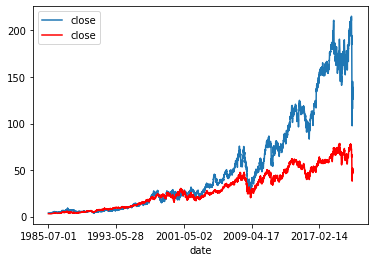

In [11]:

ax = first_stock_df.plot(y='close')
second_stock_df.plot(y='close', color='red', ax=ax)

In [12]:
n_rows = len(first_stock_df)
n_days_stride = 365

previous_row = 0
c = 0

correlation_per_time_period = defaultdict(list)
for day_window in range(n_rows):
    
    if day_window % 100 == 0:
        print(f"Idx {day_window} out of {n_rows}")
    first_stock= first_stock_df.iloc[previous_row:day_window + n_days_stride, :]
    second_stock = second_stock_df.iloc[previous_row:day_window + n_days_stride, :]
#     print(f"Correcoef for {first_stock.index.min()} to {second_stock.index.max()}")
    correlation = np.corrcoef(first_stock.close, second_stock.close)[0,1]

#     print(correlation) 
    
    correlation_per_time_period['date'].append(first_stock.index.min())
    correlation_per_time_period['correlation'].append(correlation)
    
    previous_row+= 1

    
    

Idx 0 out of 8988
Idx 100 out of 8988
Idx 200 out of 8988
Idx 300 out of 8988
Idx 400 out of 8988
Idx 500 out of 8988
Idx 600 out of 8988
Idx 700 out of 8988
Idx 800 out of 8988
Idx 900 out of 8988
Idx 1000 out of 8988
Idx 1100 out of 8988
Idx 1200 out of 8988
Idx 1300 out of 8988
Idx 1400 out of 8988
Idx 1500 out of 8988
Idx 1600 out of 8988
Idx 1700 out of 8988
Idx 1800 out of 8988
Idx 1900 out of 8988
Idx 2000 out of 8988
Idx 2100 out of 8988
Idx 2200 out of 8988
Idx 2300 out of 8988
Idx 2400 out of 8988
Idx 2500 out of 8988
Idx 2600 out of 8988
Idx 2700 out of 8988
Idx 2800 out of 8988
Idx 2900 out of 8988
Idx 3000 out of 8988
Idx 3100 out of 8988
Idx 3200 out of 8988
Idx 3300 out of 8988
Idx 3400 out of 8988
Idx 3500 out of 8988
Idx 3600 out of 8988
Idx 3700 out of 8988
Idx 3800 out of 8988
Idx 3900 out of 8988
Idx 4000 out of 8988
Idx 4100 out of 8988
Idx 4200 out of 8988
Idx 4300 out of 8988
Idx 4400 out of 8988
Idx 4500 out of 8988
Idx 4600 out of 8988
Idx 4700 out of 8988
Idx 

/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [15]:
correlation_df = pd.DataFrame(correlation_per_time_period)
correlation_df.set_index('date')

,correlation
date,
1985-07-01,0.908957
1985-07-02,0.908344
1985-07-03,0.908069
1985-07-05,0.907743
1985-07-08,0.907586
...,...
2020-04-13,0.936544
2020-04-14,0.965812
2020-04-15,0.970104


In [16]:
correlation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8988 entries, 0 to 8987
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         8988 non-null   object 
 1   correlation  8987 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.6+ KB


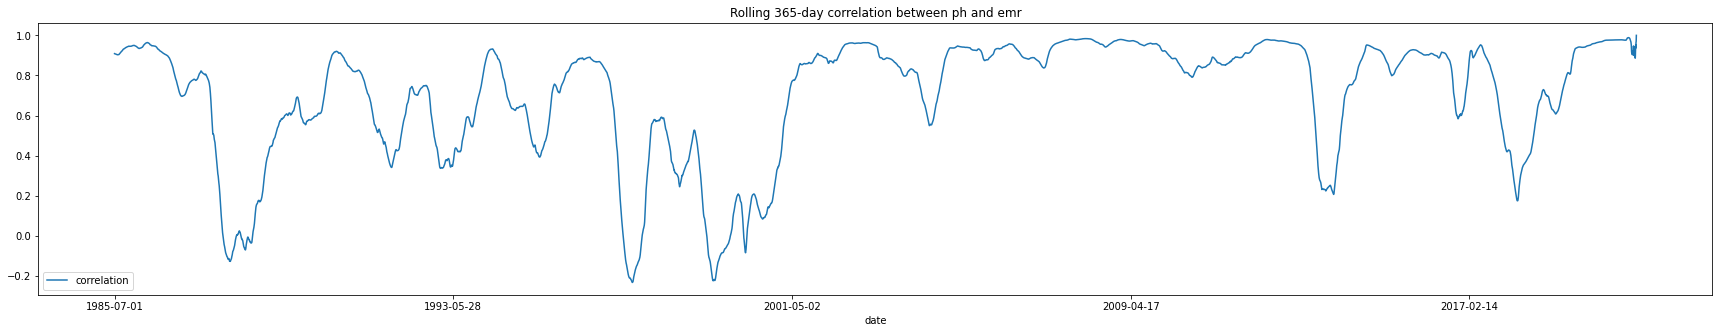

In [17]:
correlation_df.set_index('date').plot(figsize=(30,5), title='Rolling 365-day correlation between ph and emr')

In [19]:
correlation_df.date.max()

'2020-04-17'

In [20]:
correlation_df

,date,correlation
0,1985-07-01,0.908957
1,1985-07-02,0.908344
2,1985-07-03,0.908069
3,1985-07-05,0.907743
4,1985-07-08,0.907586
...,...,...
8983,2020-04-13,0.936544
8984,2020-04-14,0.965812
8985,2020-04-15,0.970104
8986,2020-04-16,1.000000


In [21]:
correlation_df

,date,correlation
0,1985-07-01,0.908957
1,1985-07-02,0.908344
2,1985-07-03,0.908069
3,1985-07-05,0.907743
4,1985-07-08,0.907586
...,...,...
8983,2020-04-13,0.936544
8984,2020-04-14,0.965812
8985,2020-04-15,0.970104
8986,2020-04-16,1.000000


## Build a function to create correlation features for all pairs of stocks

In [32]:
def build_correlation_dfs(dict_of_stocks_and_dfs, n_day_rolling_features_list=[ 3, 7, 30, 180, 365, 720]):
    """
    Create correlation + variance based  upon daily closing stock prices for given date ranges 3, 7, 30, 180, 365 days
    
    also include daily volume
    
    We are trying to  predict 7 day correaltion
    """

    stock_features_dict = defaultdict(pd.DataFrame)
    start_time = time.time()
    
    start = time.time()
    n_stocks = len(dict_of_stocks_and_dfs.keys())
    
    for idx, first_stock_name in enumerate(dict_of_stocks_and_dfs.keys()):
        print('')
        print(f"Finished {idx/n_stocks} pct of stocks")
        print('')
        for second_stock_name in dict_of_stocks_and_dfs.keys():
            if first_stock_name == second_stock_name:
                continue
            print('-------')
            print(f"{first_stock_name} & {second_stock_name}")
            print('-------')
            
            # here the date is not the index, yet
            first_stock_df = dict_of_stocks_and_dfs[f"{first_stock_name}"].loc[ 
                dict_of_stocks_and_dfs[f"{first_stock_name}"].date.isin(dict_of_stocks_and_dfs[f"{second_stock_name}"].date), :]
            #  filter second df by the dates in first

            # here the date is not the index, yet
            second_stock_df = dict_of_stocks_and_dfs[f"{second_stock_name}"].loc[ 
                dict_of_stocks_and_dfs[f"{second_stock_name}"].date.isin(dict_of_stocks_and_dfs[f"{first_stock_name}"].date), :]

            # set the date as an index and sort by date
            first_stock_df = first_stock_df.sort_values('date')
            second_stock_df = second_stock_df.sort_values('date')

            first_stock_df = first_stock_df.set_index('date')
            second_stock_df = second_stock_df.set_index('date')
            
            all_features_df = None
            for rolling_idx, rolling_day in enumerate(n_day_rolling_features_list):
                features_df = create_correlation_and_variance_features(
                    first_stock_df, second_stock_df, rolling_day, first_stock_name=first_stock_name, second_stock_name=second_stock_name)
                 
                if rolling_idx == 0: # only add in volume features once
                    features_df[f"{first_stock_name}_volume"] = list(first_stock_df.volume)
                    features_df[f"{second_stock_name}_volume"] = list(second_stock_df.volume)
                    all_features_df = features_df
                else:
                    all_features_df = all_features_df.set_index('date').merge(features_df, on='date')
            print(all_features_df.info())
        
            stock_features_dict[f"{first_stock_name}_and_{second_stock_name}"] = all_features_df
            
            end = time.time()
            print(f"Building all correlations took {(end-start)/60} minutes")
            start = time.time()
            
        if idx == 2:
            break

    end_time = time.time()
    print(f"Total time {(end_time-start_time) / 60} minutes")
    return stock_features_dict
            
        

# Note: will eventuall need to add in 0s for stocks withour correlation data with other stocks due to date range

In [33]:
def create_correlation_and_variance_features(first_stock_df, second_stock_df, n_days_stride, 
                                             first_stock_name=None, second_stock_name=None):
    """
    n_days_stride: the  number of rolling days to calculate correlation for
    """
    n_rows = len(first_stock_df)

    previous_row = 0

    features_per_time_period = defaultdict(list)
    print(f"Creating correlations + variance on close for {n_days_stride} days")
    
    for day_window in tqdm(range(n_rows)):


        first_stock= first_stock_df.iloc[previous_row:day_window + n_days_stride, :]
        second_stock = second_stock_df.iloc[previous_row:day_window + n_days_stride, :]
        
        try:
            correlation = np.corrcoef(first_stock.close, second_stock.close)[0,1]
        except Exception as e:
            print(f" ERROR: {e}")

        features_per_time_period['date'].append(first_stock.index.min())

        features_per_time_period[f"{first_stock_name}_{second_stock_name}_corr_rolling_{n_days_stride}_days"].append(correlation)
        # CODE TO ADD IN VARIANCE
#         first_stock_var = np.var(first_stock.close)
#         second_stock_var = np.var(second_stock.close)
        
#         features_per_time_period[f"{first_stock_name}_close_var_rolling_{n_days_stride}_days"].append(first_stock_var)
#         features_per_time_period[f"{second_stock_name}_close_var_rolling_{n_days_stride}_days"].append(second_stock_var)
    
        
        previous_row+= 1 # calculate snapshots every day...7/1-7/7, 7/2-7/8, ...etc
    
    print('Finished feature calculation')
    features_per_time_period_df = pd.DataFrame(features_per_time_period)
    features_per_time_period_df.set_index('date')
    
    return features_per_time_period_df


In [ ]:
# 100 minutes for 20 stocks (20*20 = 400 pairs each pair takes .25 minutes)
final_stock_df = build_correlation_dfs(dict_of_stocks_and_dfs)

  2%|▏         | 88/4029 [00:00<00:04, 871.23it/s]


Finished 0.0 pct of stocks

-------
pnr & bac
-------
Creating correlations + variance on close for 3 days


 98%|█████████▊| 3959/4029 [00:04<00:00, 1254.41it/s]/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
  3%|▎         | 128/4029 [00:00<00:03, 1276.35it/s]

Finished feature calculation
Creating correlations + variance on close for 7 days


  2%|▏         | 91/4029 [00:00<00:04, 904.64it/s]

Finished feature calculation
Creating correlations + variance on close for 30 days


  3%|▎         | 104/4029 [00:00<00:03, 1031.52it/s]

Finished feature calculation
Creating correlations + variance on close for 180 days


  2%|▏         | 70/4029 [00:00<00:05, 691.13it/s]

Finished feature calculation
Creating correlations + variance on close for 365 days


  2%|▏         | 83/4029 [00:00<00:04, 829.99it/s]

Finished feature calculation
Creating correlations + variance on close for 720 days


  3%|▎         | 129/4029 [00:00<00:03, 1284.10it/s]

Finished feature calculation
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17545 entries, 0 to 17544
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           17545 non-null  object 
 1   pnr_bac_corr_rolling_3_days    17543 non-null  float64
 2   pnr_volume                     17545 non-null  int64  
 3   bac_volume                     17545 non-null  int64  
 4   pnr_bac_corr_rolling_7_days    17544 non-null  float64
 5   pnr_bac_corr_rolling_30_days   17544 non-null  float64
 6   pnr_bac_corr_rolling_180_days  17544 non-null  float64
 7   pnr_bac_corr_rolling_365_days  17544 non-null  float64
 8   pnr_bac_corr_rolling_720_days  17544 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.3+ MB
None
Building all correlations took 0.3690439860026042 minutes
-------
pnr & ni
-------
Creating correlations + variance on close for 3 days


  4%|▎         | 147/4029 [00:00<00:02, 1464.35it/s]

Finished feature calculation
Creating correlations + variance on close for 7 days


  3%|▎         | 128/4029 [00:00<00:03, 1276.27it/s]

Finished feature calculation
Creating correlations + variance on close for 30 days


  4%|▍         | 161/4029 [00:00<00:02, 1609.76it/s]

Finished feature calculation
Creating correlations + variance on close for 180 days


  4%|▍         | 152/4029 [00:00<00:02, 1511.34it/s]

Finished feature calculation
Creating correlations + variance on close for 365 days


  4%|▎         | 148/4029 [00:00<00:02, 1475.25it/s]

Finished feature calculation
Creating correlations + variance on close for 720 days


  4%|▍         | 158/4029 [00:00<00:02, 1579.70it/s]

Finished feature calculation
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17545 entries, 0 to 17544
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          17545 non-null  object 
 1   pnr_ni_corr_rolling_3_days    17480 non-null  float64
 2   pnr_volume                    17545 non-null  int64  
 3   ni_volume                     17545 non-null  int64  
 4   pnr_ni_corr_rolling_7_days    17544 non-null  float64
 5   pnr_ni_corr_rolling_30_days   17544 non-null  float64
 6   pnr_ni_corr_rolling_180_days  17544 non-null  float64
 7   pnr_ni_corr_rolling_365_days  17544 non-null  float64
 8   pnr_ni_corr_rolling_720_days  17544 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.3+ MB
None
Building all correlations took 0.30011768341064454 minutes
-------
pnr & vno
-------
Creating correlations + variance on close for 3 days


  4%|▍         | 156/4029 [00:00<00:02, 1554.63it/s]

Finished feature calculation
Creating correlations + variance on close for 7 days


  4%|▍         | 155/4029 [00:00<00:02, 1548.44it/s]

Finished feature calculation
Creating correlations + variance on close for 30 days


  4%|▍         | 152/4029 [00:00<00:02, 1516.69it/s]

Finished feature calculation
Creating correlations + variance on close for 180 days


  4%|▎         | 148/4029 [00:00<00:02, 1471.04it/s]

Finished feature calculation
Creating correlations + variance on close for 365 days


  3%|▎         | 140/4029 [00:00<00:02, 1398.64it/s]

Finished feature calculation
Creating correlations + variance on close for 720 days


  4%|▍         | 152/3799 [00:00<00:02, 1512.72it/s]

Finished feature calculation
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17545 entries, 0 to 17544
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           17545 non-null  object 
 1   pnr_vno_corr_rolling_3_days    17544 non-null  float64
 2   pnr_volume                     17545 non-null  int64  
 3   vno_volume                     17545 non-null  int64  
 4   pnr_vno_corr_rolling_7_days    17544 non-null  float64
 5   pnr_vno_corr_rolling_30_days   17544 non-null  float64
 6   pnr_vno_corr_rolling_180_days  17544 non-null  float64
 7   pnr_vno_corr_rolling_365_days  17544 non-null  float64
 8   pnr_vno_corr_rolling_720_days  17544 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.3+ MB
None
Building all correlations took 0.2736776312192281 minutes
-------
pnr & ual
-------
Creating correlations + variance on close for 3 days

  4%|▍         | 158/3799 [00:00<00:02, 1573.42it/s]

Finished feature calculation
Creating correlations + variance on close for 7 days


  4%|▍         | 151/3799 [00:00<00:02, 1502.94it/s]

Finished feature calculation
Creating correlations + variance on close for 30 days


  4%|▍         | 156/3799 [00:00<00:02, 1554.90it/s]

Finished feature calculation
Creating correlations + variance on close for 180 days


  4%|▍         | 145/3799 [00:00<00:02, 1446.28it/s]

Finished feature calculation
Creating correlations + variance on close for 365 days


  4%|▍         | 145/3799 [00:00<00:02, 1446.69it/s]

Finished feature calculation
Creating correlations + variance on close for 720 days


  4%|▍         | 164/4029 [00:00<00:02, 1637.69it/s]

Finished feature calculation
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17315 entries, 0 to 17314
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           17315 non-null  object 
 1   pnr_ual_corr_rolling_3_days    17250 non-null  float64
 2   pnr_volume                     17315 non-null  int64  
 3   ual_volume                     17315 non-null  int64  
 4   pnr_ual_corr_rolling_7_days    17314 non-null  float64
 5   pnr_ual_corr_rolling_30_days   17314 non-null  float64
 6   pnr_ual_corr_rolling_180_days  17314 non-null  float64
 7   pnr_ual_corr_rolling_365_days  17314 non-null  float64
 8   pnr_ual_corr_rolling_720_days  17314 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.3+ MB
None
Building all correlations took 0.25429689486821494 minutes
-------
pnr & efx
-------
Creating correlations + variance on close for 3 day

  4%|▍         | 161/4029 [00:00<00:02, 1601.46it/s]

Finished feature calculation
Creating correlations + variance on close for 7 days


  4%|▍         | 159/4029 [00:00<00:02, 1580.51it/s]

Finished feature calculation
Creating correlations + variance on close for 30 days


  4%|▍         | 154/4029 [00:00<00:02, 1537.51it/s]

Finished feature calculation
Creating correlations + variance on close for 180 days


  4%|▍         | 156/4029 [00:00<00:02, 1552.44it/s]

Finished feature calculation
Creating correlations + variance on close for 365 days


  3%|▎         | 134/4029 [00:00<00:02, 1335.49it/s]

Finished feature calculation
Creating correlations + variance on close for 720 days


  4%|▍         | 155/4029 [00:00<00:02, 1538.25it/s]

Finished feature calculation
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17545 entries, 0 to 17544
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           17545 non-null  object 
 1   pnr_efx_corr_rolling_3_days    17544 non-null  float64
 2   pnr_volume                     17545 non-null  int64  
 3   efx_volume                     17545 non-null  int64  
 4   pnr_efx_corr_rolling_7_days    17544 non-null  float64
 5   pnr_efx_corr_rolling_30_days   17544 non-null  float64
 6   pnr_efx_corr_rolling_180_days  17544 non-null  float64
 7   pnr_efx_corr_rolling_365_days  17544 non-null  float64
 8   pnr_efx_corr_rolling_720_days  17544 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.3+ MB
None
Building all correlations took 0.26570406357447307 minutes
-------
pnr & ph
-------
Creating correlations + variance on close for 3 days

  4%|▍         | 160/4029 [00:00<00:02, 1597.41it/s]

Finished feature calculation
Creating correlations + variance on close for 7 days


  4%|▍         | 154/4029 [00:00<00:02, 1538.91it/s]

Finished feature calculation
Creating correlations + variance on close for 30 days


  4%|▍         | 162/4029 [00:00<00:02, 1615.95it/s]

Finished feature calculation
Creating correlations + variance on close for 180 days


  4%|▎         | 148/4029 [00:00<00:02, 1475.26it/s]

Finished feature calculation
Creating correlations + variance on close for 365 days


  4%|▎         | 142/4029 [00:00<00:02, 1409.04it/s]

Finished feature calculation
Creating correlations + variance on close for 720 days


  4%|▍         | 152/4029 [00:00<00:02, 1512.25it/s]

Finished feature calculation
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17545 entries, 0 to 17544
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          17545 non-null  object 
 1   pnr_ph_corr_rolling_3_days    17543 non-null  float64
 2   pnr_volume                    17545 non-null  int64  
 3   ph_volume                     17545 non-null  int64  
 4   pnr_ph_corr_rolling_7_days    17544 non-null  float64
 5   pnr_ph_corr_rolling_30_days   17544 non-null  float64
 6   pnr_ph_corr_rolling_180_days  17544 non-null  float64
 7   pnr_ph_corr_rolling_365_days  17544 non-null  float64
 8   pnr_ph_corr_rolling_720_days  17544 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.3+ MB
None
Building all correlations took 0.2685550014177958 minutes
-------
pnr & rop
-------
Creating correlations + variance on close for 3 days


  4%|▍         | 158/4029 [00:00<00:02, 1577.71it/s]

Finished feature calculation
Creating correlations + variance on close for 7 days


 39%|███▉      | 1576/4029 [00:01<00:01, 1570.24it/s]

In [ ]:
final_stock_df.values()

In [ ]:
final_stock_df['pnr_and_bac'].set_index('date')[['corr_rolling_365_days','corr_rolling_180_days', 
                                                 'corr_rolling_30_days', 'corr_rolling_720_days']].plot(figsize=(15,5))

## Train Test Split to predict correaltion over the next 7 days